## TIFF Data Calibration


Created by: Michael Marinaccio, Clemson University <br />
https://github.com/mnmarinaccio <br />
Date: 03-05-2024


In [1]:
import os
import numpy as np
from PIL import Image
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tifffile as tf
import exif as EXIF

### Example Entire Folder Calibrate TIFF Files, Save New Thermal JPGs

In [2]:
# Loop through, calibrate tiffs and save new thermal jpgs colormapped from calibrated TIFFs
# Set the directory path
dataset = 'Sycan'
input_path = f'./data/Images_{dataset}/TIFF'

# Define output directories
calibrated_tiff_dir = f'./output_folders/{dataset}_CalibratedTIFF'
calibrated_jpg_dir = f'./output_folders/{dataset}_CalibratedThermalJPG'

# Create them if they don’t exist
os.makedirs(calibrated_tiff_dir, exist_ok=True)
os.makedirs(calibrated_jpg_dir, exist_ok=True)

i = 0
for file in os.listdir(input_path):
    if i % 50 == 0:
        print(f'{i} IMAGES PROCESSED')
    if file.lower().endswith('.tiff'):
        file_path = os.path.join(input_path, file)
        
        # Remove '.TIFF' extension for the base filename
        filename_base = os.path.splitext(file)[0]

        # Open raw TIFF
        raw_tiff = tf.imread(file_path)

        # Apply TIFF corrections
        corrected_tiff = np.clip(raw_tiff, 0, 500).astype(np.float32)

        # Save the corrected TIFF
        tf.imwrite(os.path.join(calibrated_tiff_dir, f'{filename_base}.TIFF'), 
                   corrected_tiff, dtype=corrected_tiff.dtype)
        
        # Open original thermal JPEG for metadata
        original_thermal_img = Image.open(f'./data/Images_{dataset}/Thermal/{filename_base}.JPG')
        
        # Apply the Inferno colormap and convert to RGB
        inferno_colormap = cm.get_cmap('inferno')

        # Normalize the data to 0–1 for colormapping
        norm_tiff = (corrected_tiff - np.min(corrected_tiff)) / (np.max(corrected_tiff) - np.min(corrected_tiff))

        # Apply the colormap and convert to RGB (ignore alpha channel)
        colored_image = inferno_colormap(norm_tiff)[..., :3]  # Drop alpha channel

        # Convert to uint8 format for image saving (scale 0-255)
        rgb_image = (colored_image * 255).astype(np.uint8)

        # Save the RGB image using PIL with original EXIF metadata
        new_thermal_img = Image.fromarray(rgb_image)
        new_thermal_img.save(
            os.path.join(calibrated_jpg_dir, f'{filename_base}.JPG'),
            exif=original_thermal_img.info.get('exif')
        )
    i += 1


0 IMAGES PROCESSED


/local_scratch/slurm.5399825/ipykernel_2153109/3188398028.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno_colormap = cm.get_cmap('inferno')


### Print Basic TIFF Statistics

In [3]:
dataset = 'Sycan'
imageNum = '00006'
raw_tiff = tf.imread(f'./data/Images_{dataset}/TIFF/{imageNum}.TIFF')
calibrated_tiff = tf.imread(f'./output_folders/{dataset}_CalibratedTIFF/{imageNum}.TIFF')

# Analyze basic statistics
print("Raw TIFF")
print("Min Value:", np.min(raw_tiff))
print("Max Value:", np.max(raw_tiff))
print("Mean Value:", np.mean(raw_tiff))

print("")
print("Calibrated TIFF")
print("Min Value:", np.min(calibrated_tiff))
print("Max Value:", np.max(calibrated_tiff))
print("Mean Value:", np.mean(calibrated_tiff))


Raw TIFF
Min Value: -40.558937
Max Value: 187.42365
Mean Value: 6.621611

Calibrated TIFF
Min Value: 0.0
Max Value: 187.42365
Mean Value: 9.359331


### Example Single TIFF File Calibration and Visualization with Inferno Colormap

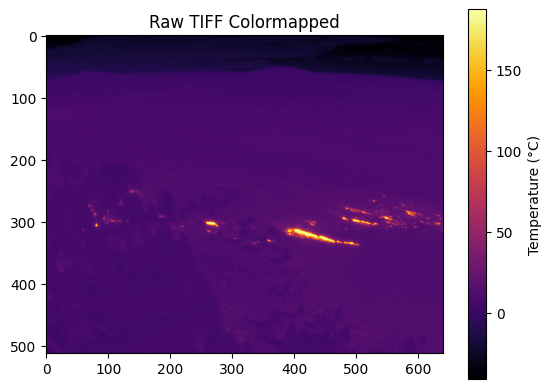

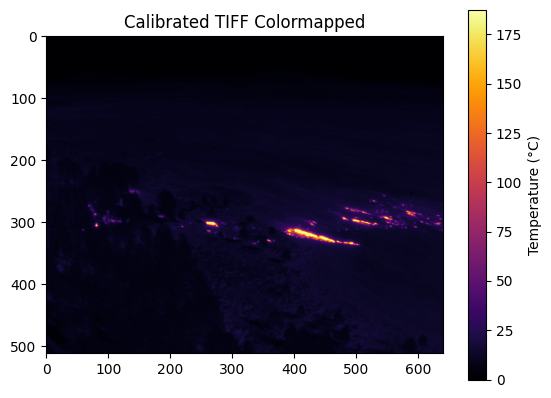

In [4]:
dataset = 'Sycan'
imageNum = '00006'
raw_tiff = tf.imread(f'./data/Images_{dataset}/TIFF/{imageNum}.TIFF')

# Ensure the data type is appropriate (e.g., float32)
calibrated_tiff = np.clip(raw_tiff, 0, 500).astype(np.float32)

# Save the array as a TIFF file, uncomment to save individual calibrated tiff file
tf.imwrite(f'./output_images/{dataset}_{imageNum}_calibrated.TIFF', calibrated_tiff, dtype=calibrated_tiff.dtype)

plt.imshow(raw_tiff, cmap='inferno')
plt.colorbar(label="Temperature (°C)")
plt.title("Raw TIFF Colormapped")
plt.show()

plt.imshow(calibrated_tiff, cmap='inferno')
plt.colorbar(label='Temperature (°C)')
plt.title("Calibrated TIFF Colormapped")
plt.show()

### Example Single Thermal JPG Calibration Before and After

/local_scratch/slurm.5399825/ipykernel_2153109/524082171.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno_colormap = cm.get_cmap('inferno')


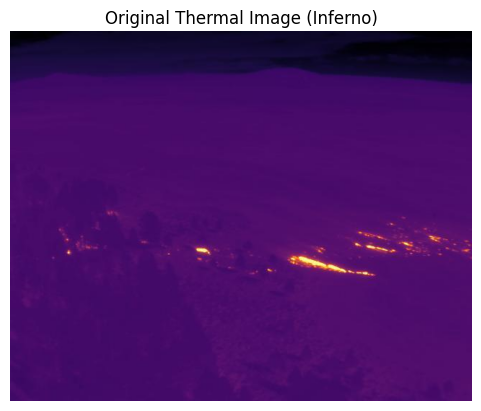

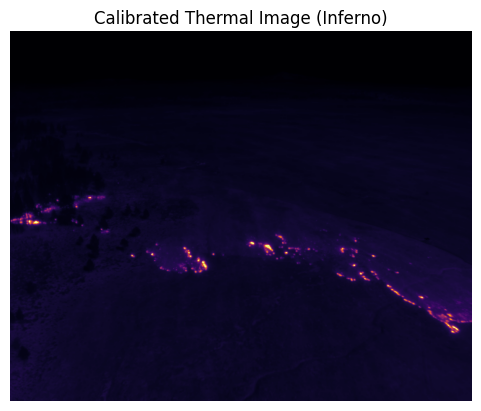

In [5]:
dataset = 'Sycan'
imageNum = '00006'
original_thermal_img = Image.open(f'./data/Images_{dataset}/Thermal/{imageNum}.JPG')
# Apply the Inferno colormap and convert to RGB
inferno_colormap = cm.get_cmap('inferno')

# Normalize the data to 0–1 for colormapping
norm_tiff = (corrected_tiff - np.min(corrected_tiff)) / (np.max(corrected_tiff) - np.min(corrected_tiff))

# Apply the colormap and convert to RGB (ignore alpha channel)
colored_image = inferno_colormap(norm_tiff)[..., :3]  # Drop alpha channel

# Convert to uint8 format for image saving (scale 0-255)
rgb_image = (colored_image * 255).astype(np.uint8)

# Save the RGB image using PIL
new_thermal_img = Image.fromarray(rgb_image)
new_thermal_img.save(f'./output_images/{dataset}_{imageNum}_calibrated.JPG', exif=original_thermal_img.info['exif'])

# Optional: Display the saved image
plt.imshow(original_thermal_img)
plt.title("Original Thermal Image (Inferno)")
plt.axis('off')
plt.show()

plt.imshow(new_thermal_img)
plt.title("Calibrated Thermal Image (Inferno)")
plt.axis('off')
plt.show()